<a href="https://colab.research.google.com/github/younisalazzeh/Internintelligance_Safety_Equipment-s/blob/main/Safety_equipment's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the libraries


In [ ]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from roboflow import Roboflow
from ultralytics import YOLO
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# installing the Data from Roboflow


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1WpdQQkIGXm3OcELC5qM")
project = rf.workspace("apd-0zj3f").project("innowork-24")
version = project.version(4)
dataset = version.download("yolov11")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Innowork-24-4 in yolov11:: 100%|██████████| 16834/16834 [00:02<00:00, 5945.83it/s]


# Installing the ultralytics library



In [2]:
# Install necessary libraries
os.system("pip install roboflow ultralytics")3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Training the model


In [ ]:
def train_model(model_path, data_yaml, epochs=50, device=0):
    """Train YOLOv11 model"""
    model = YOLO(model_path)  # Load pretrained model
    results = model.train(data=data_yaml, epochs=epochs, imgsz=640, device=device)
    return results

# Train the model
trained_model_results = train_model("yolo11n.pt", "/content/Innowork-24-4/data.yaml")


Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Innowork-24-4/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 40.7MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/Innowork-24-4/train/labels... 6238 images, 37 backgrounds, 0 corrupt: 100%|██████████| 6238/6238 [00:10<00:00, 596.93it/s]

train: WARNING ⚠️ /content/Innowork-24-4/train/images/104_jpg.rf.41a4c1142ef910f58e6d6186ed89797d.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/104_jpg.rf.b06be7992e881cbec2d1a788a6eae336.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/107_jpg.rf.a6c304cecd4ce09d493586d4851bf0a4.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/10_jpg.rf.c230014b1395114983e4d2d3c1e5666f.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/110_jpg.rf.f031f40550f26fe7a27dd1e917eb2401.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/111_jpg.rf.775ad5da99471893e69ad1f8f9cd8ecc.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/112_jpg.rf.a385721171f68174ac14b9f0b8d8099f.jpg: 2 duplicate labels removed
train: WARNING ⚠️ /content/Innowork-24-4/train/images/115_jpg.rf.786e33b4e80063bccbab702c6a

train: New cache created: /content/Innowork-24-4/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Innowork-24-4/valid/labels... 1595 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1595/1595 [00:03<00:00, 480.87it/s]

val: New cache created: /content/Innowork-24-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 104, len(boxes) = 5592. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.57G      1.418       2.91      1.494         78        640: 100%|██████████| 390/390 [02:11<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:18<00:00,  2.69it/s]


                   all       1595       5592      0.519      0.448      0.412       0.25

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.37G      1.341      1.848      1.419         61        640: 100%|██████████| 390/390 [02:08<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.34it/s]


                   all       1595       5592      0.421      0.482      0.411      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.28G      1.312      1.648      1.402         77        640: 100%|██████████| 390/390 [02:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.13it/s]


                   all       1595       5592      0.447      0.563      0.464      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.32G       1.29      1.504      1.388        119        640: 100%|██████████| 390/390 [02:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]


                   all       1595       5592      0.492      0.546      0.497      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.32G      1.251      1.373      1.363         80        640: 100%|██████████| 390/390 [02:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.06it/s]

                   all       1595       5592      0.489       0.61      0.513       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.32G      1.232      1.289      1.343         65        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]

                   all       1595       5592      0.505      0.576      0.519      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.35G      1.214      1.257      1.339         71        640: 100%|██████████| 390/390 [02:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]


                   all       1595       5592      0.533      0.572      0.533      0.331

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.32G      1.199      1.196      1.327         71        640: 100%|██████████| 390/390 [02:02<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  2.98it/s]


                   all       1595       5592      0.491      0.648      0.542       0.34

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.44G       1.19      1.163      1.313         64        640: 100%|██████████| 390/390 [02:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.35it/s]

                   all       1595       5592      0.537      0.596      0.536      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.36G      1.181      1.141      1.308         71        640: 100%|██████████| 390/390 [02:05<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]

                   all       1595       5592      0.519      0.635      0.547      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.37G      1.174      1.131      1.307         98        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]


                   all       1595       5592      0.513       0.64       0.55      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G      1.157      1.081      1.289         76        640: 100%|██████████| 390/390 [02:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]

                   all       1595       5592      0.551      0.606      0.565      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       2.5G      1.151      1.073      1.286         71        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.19it/s]


                   all       1595       5592      0.561      0.634      0.554      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.34G      1.137      1.053       1.28         61        640: 100%|██████████| 390/390 [02:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]

                   all       1595       5592      0.504      0.672      0.563      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.38G      1.135      1.034      1.282         77        640: 100%|██████████| 390/390 [02:01<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]


                   all       1595       5592      0.517      0.693      0.588      0.377

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.54G      1.118      1.005      1.268         76        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]

                   all       1595       5592      0.522      0.673      0.567      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.41G      1.113      1.003      1.265         83        640: 100%|██████████| 390/390 [02:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.25it/s]


                   all       1595       5592       0.52      0.695      0.577      0.372

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.38G      1.111      0.993      1.268        145        640: 100%|██████████| 390/390 [02:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]

                   all       1595       5592      0.529      0.673      0.562      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.33G      1.102      0.965      1.257         80        640: 100%|██████████| 390/390 [02:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.31it/s]

                   all       1595       5592      0.577      0.652      0.592      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.37G      1.099     0.9585       1.25         61        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.16it/s]

                   all       1595       5592       0.52      0.675      0.593       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.38G      1.086     0.9441      1.244         91        640: 100%|██████████| 390/390 [02:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.23it/s]

                   all       1595       5592      0.526       0.68      0.581      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.35G      1.085     0.9351      1.244         68        640: 100%|██████████| 390/390 [02:02<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]

                   all       1595       5592       0.55      0.694      0.592      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.43G       1.08     0.9275      1.237         68        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.15it/s]

                   all       1595       5592      0.561      0.666      0.603      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G      1.062     0.9064       1.23         81        640: 100%|██████████| 390/390 [02:02<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]

                   all       1595       5592      0.545      0.685      0.618      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.36G      1.065      0.903      1.232         92        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.20it/s]

                   all       1595       5592      0.557      0.722      0.625      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.46G      1.049     0.8876      1.229         80        640: 100%|██████████| 390/390 [02:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.39it/s]

                   all       1595       5592      0.535      0.714      0.629      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.41G      1.059     0.8896      1.227        130        640: 100%|██████████| 390/390 [02:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]

                   all       1595       5592      0.558      0.687      0.606      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.34G      1.048     0.8836      1.226         73        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]

                   all       1595       5592      0.539      0.707      0.612      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.43G      1.049     0.8804      1.219         86        640: 100%|██████████| 390/390 [02:04<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]

                   all       1595       5592      0.561      0.656      0.598      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.35G      1.045     0.8676      1.213         94        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.44it/s]

                   all       1595       5592      0.562      0.676      0.621      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.33G       1.04     0.8522      1.211         80        640: 100%|██████████| 390/390 [02:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.34it/s]

                   all       1595       5592      0.551      0.674      0.602      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.33G      1.029     0.8518      1.204         73        640: 100%|██████████| 390/390 [02:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]

                   all       1595       5592      0.544      0.697      0.602        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G      1.029     0.8467      1.207        100        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.22it/s]

                   all       1595       5592      0.545      0.744      0.624      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.39G      1.032     0.8443      1.208         80        640: 100%|██████████| 390/390 [02:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]

                   all       1595       5592      0.527      0.717      0.598      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.33G      1.011     0.8159      1.198        113        640: 100%|██████████| 390/390 [02:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.42it/s]

                   all       1595       5592      0.547      0.713      0.595      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.32G      1.017     0.8252      1.196         78        640: 100%|██████████| 390/390 [02:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.41it/s]

                   all       1595       5592      0.547      0.719      0.604      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.33G      1.007     0.8159      1.196         82        640: 100%|██████████| 390/390 [02:08<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]

                   all       1595       5592      0.561      0.698      0.607      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.36G      1.002      0.819      1.192         68        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.28it/s]

                   all       1595       5592      0.543      0.708      0.607      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.37G     0.9946     0.8083      1.191         69        640: 100%|██████████| 390/390 [02:00<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.40it/s]

                   all       1595       5592      0.567      0.691      0.619      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.32G     0.9942     0.7933      1.185         80        640: 100%|██████████| 390/390 [02:01<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.43it/s]

                   all       1595       5592      0.544      0.723      0.605      0.404


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.37G      1.015     0.7655      1.235         67        640: 100%|██████████| 390/390 [01:59<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.30it/s]

                   all       1595       5592      0.536      0.728      0.597      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.38G     0.9992     0.7423      1.227         44        640: 100%|██████████| 390/390 [01:56<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.10it/s]

                   all       1595       5592      0.553      0.717      0.604      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50       2.4G     0.9958     0.7364      1.217         48        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.05it/s]

                   all       1595       5592       0.55      0.725      0.596      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.33G     0.9875      0.728      1.212         50        640: 100%|██████████| 390/390 [02:00<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:16<00:00,  3.09it/s]

                   all       1595       5592      0.554       0.71       0.61      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.34G     0.9807     0.7197      1.209         44        640: 100%|██████████| 390/390 [02:01<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.38it/s]

                   all       1595       5592      0.558       0.71      0.616      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.33G     0.9742     0.7094        1.2         47        640: 100%|██████████| 390/390 [01:58<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.35it/s]

                   all       1595       5592      0.555      0.714      0.616      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.32G     0.9738     0.7066      1.198         36        640: 100%|██████████| 390/390 [01:56<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.18it/s]

                   all       1595       5592      0.558      0.706      0.614      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.32G     0.9642     0.7021      1.197         49        640: 100%|██████████| 390/390 [01:57<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]

                   all       1595       5592      0.553      0.711      0.604      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50       2.4G     0.9577     0.6951      1.192         52        640: 100%|██████████| 390/390 [01:57<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:15<00:00,  3.17it/s]

                   all       1595       5592      0.561      0.705      0.606      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.33G     0.9588     0.6928       1.19         56        640: 100%|██████████| 390/390 [01:58<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.37it/s]

                   all       1595       5592      0.562      0.705      0.606      0.407



50 epochs completed in 1.920 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:17<00:00,  2.81it/s]


                   all       1595       5592      0.535      0.716      0.629      0.412
        Ear Protection         92        147      0.488      0.612      0.462      0.189
               Glasses        172        179      0.425      0.777      0.421      0.211
                Gloves        448        840      0.764       0.82      0.815      0.499
                Helmet        586        689      0.827      0.904      0.884      0.596
                  Mask        364        409       0.64      0.617      0.721      0.403
                Person        704        782      0.759      0.965      0.925      0.765
          Safety Shoes        310        635      0.573      0.603      0.669      0.463
                  Vest        464        604      0.779      0.892      0.877      0.573
Without Ear Protection        106        124      0.285      0.677      0.521      0.249
       Without Glasses        103        112      0.392      0.893      0.666      0.383
         Without Glov

# Validate the model after training it.

In [4]:
# Load trained model
model = YOLO("/content/best.pt")

def validate_model(model, data_yaml):
    """Validate the trained model"""
    return model.val(data=data_yaml)

validation_results = validate_model(model, "/content/Innowork-24-4/data.yaml")
print(validation_results)

Ultralytics 8.3.91 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 20.0MB/s]
val: Scanning /content/Innowork-24-4/valid/labels... 1595 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1595/1595 [00:00<00:00, 2098.89it/s]

val: New cache created: /content/Innowork-24-4/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 104, len(boxes) = 5592. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 100/100 [00:19<00:00,  5.20it/s]


                   all       1595       5592      0.536      0.715      0.629      0.413
        Ear Protection         92        147      0.488      0.612      0.467      0.191
               Glasses        172        179      0.425      0.777       0.42       0.21
                Gloves        448        840      0.767       0.82      0.815      0.499
                Helmet        586        689      0.826      0.903      0.882      0.597
                  Mask        364        409      0.639      0.614      0.722      0.402
                Person        704        782      0.761      0.965      0.925      0.765
          Safety Shoes        310        635      0.574      0.603       0.67      0.463
                  Vest        464        604      0.779      0.892      0.877      0.573
Without Ear Protection        106        124      0.284      0.669      0.521      0.249
       Without Glasses        103        112      0.391      0.893      0.666      0.382
         Without Glov

Ultralytics 8.3.89 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,585,077 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/Innowork-24-4/valid/labels.cache... 1595 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1595/1595 [00:00<?, ?it/s]


WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 104, len(boxes) = 5592. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


                   all       1595       5592      0.536      0.715      0.629      0.413
        Ear Protection         92        147      0.488      0.612      0.467      0.191
               Glasses        172        179      0.425      0.777       0.42       0.21
                Gloves        448        840      0.767       0.82      0.815      0.499
                Helmet        586        689      0.826      0.903      0.882      0.597
                  Mask        364        409      0.639      0.614      0.722      0.402
                Person        704        782      0.761      0.965      0.925      0.765
          Safety Shoes        310        635      0.574      0.603       0.67      0.463
                  Vest        464        604      0.779      0.892      0.877      0.573
Without Ear Protection        106        124      0.284      0.669      0.521      0.249
       Without Glasses        103        112      0.391      0.893      0.666      0.382
         Without Glov

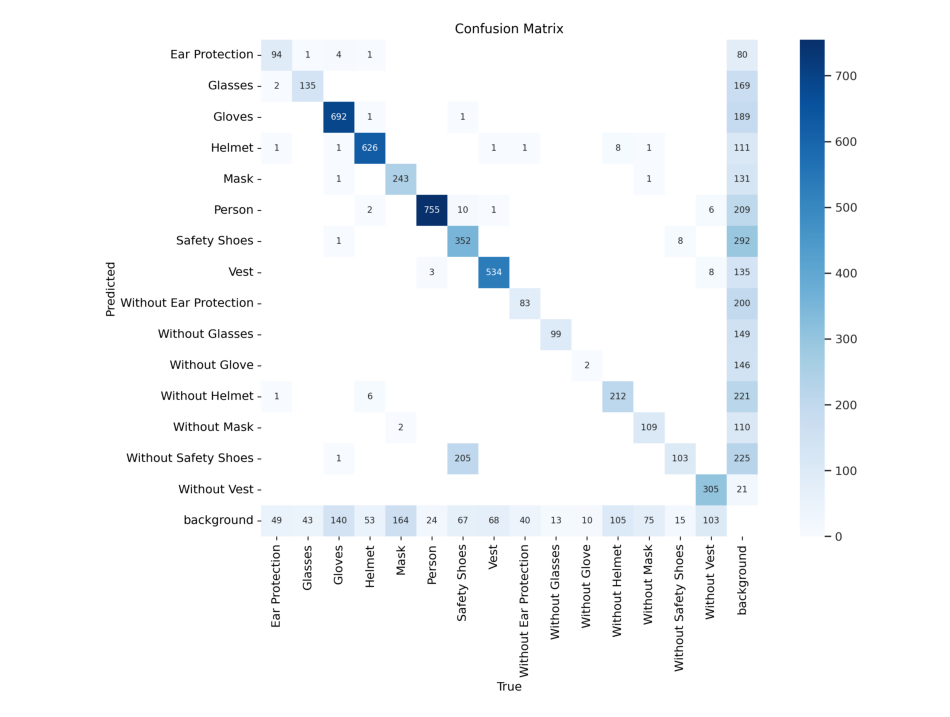

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# تحميل النموذج المدرب
model = YOLO('/content/best.pt')

# التقييم مع إنشاء الكونفيوجن ماتريكس
metrics = model.val(
    data='/content/Innowork-24-4/data.yaml',
    plots=True, # هذا سيولد الكونفيوجن ماتريكس تلقائيًا
    save_json=True # لحفظ النتائج كملف JSON
)

# عرض الكونفيوجن ماتريكس المولدة تلقائيًا
confusion_matrix_path = 'runs/detect/val/confusion_matrix.png'
img = plt.imread(confusion_matrix_path)
plt.figure(figsize=(12, 10))
plt.imshow(img)
plt.axis('off')
plt.show()


# New Section


image 1/1 /content/test_image.jpg: 416x640 1 Glasses, 2 Glovess, 1 Helmet, 1 Person, 1 Vest, 17.3ms
Speed: 3.3ms preprocess, 17.3ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 640)


array([[[  0,  22,  29],
        [  0,  26,  33],
        [  5,  31,  38],
        ...,
        [ 71,  82,  80],
        [ 71,  82,  80],
        [ 72,  83,  81]],

       [[  0,  22,  29],
        [  0,  26,  33],
        [  6,  32,  39],
        ...,
        [ 71,  82,  80],
        [ 71,  82,  80],
        [ 72,  83,  81]],

       [[  0,  22,  29],
        [  0,  26,  33],
        [  6,  32,  39],
        ...,
        [ 71,  82,  80],
        [ 71,  82,  80],
        [ 72,  83,  81]],

       ...,

       [[ 16,  27,  31],
        [ 13,  24,  28],
        [ 10,  19,  23],
        ...,
        [125, 138, 136],
        [120, 133, 131],
        [126, 139, 137]],

       [[ 15,  26,  30],
        [ 13,  24,  28],
        [ 10,  19,  23],
        ...,
        [121, 134, 132],
        [116, 129, 127],
        [121, 134, 132]],

       [[ 15,  26,  30],
        [ 12,  23,  27],
        [ 10,  19,  23],
        ...,
        [118, 131, 129],
        [112, 125, 123],
        [117, 130, 128]]], dtype=uint8)
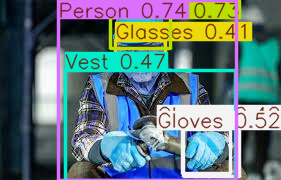

In [8]:
# Load the trained YOLOv11 model
model = YOLO("/content/best.pt")  # Replace with your actual weight file

# Load test image
image_path = "/content/test_image.jpg"  # Replace with your test image
results = model(image_path)

# Plot the results
results[0].plot()
